In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as sms
import sklearn.metrics as skm
import numpy as np
import itertools

In [4]:
# Study data files
social_data = "data\sentimentdataset.csv"
happiness_data = "data\WorldHappinessIndex2013-2023.csv"
happiness_data2 = r"data\UnionHappinessFile.csv"

# Read the mouse data and the study results
happiness_df = pd.read_csv(happiness_data)
happiness_df2 = pd.read_csv(happiness_data2)
social_df = pd.read_csv(social_data)

In [5]:
happiness_df3 = happiness_df2
happiness_df3 = happiness_df3.dropna(how='any')
happiness_df3.head()
happiness_df3.to_csv("UnionHappinessFile_clean.csv")


In [6]:
# Data preparation
social_df2 = social_df[['Country', 'Year','Platform','Sentiment','Hashtags']]
happiness_df['Country'] = happiness_df['Country'].replace('United States', 'USA')
happiness_df['Country'] = happiness_df['Country'].replace('United Kingdom', 'UK')
happiness_df2['country'] = happiness_df2['country'].replace('United States', 'USA')
happiness_df2['country'] = happiness_df2['country'].replace('United Kingdom', 'UK')
happiness_df2 = happiness_df2.rename(columns = {'country':'Country'})
social_df2['Country'] = social_df2['Country'].str.strip()

C:\Users\nigro\AppData\Local\Temp\ipykernel_21304\1818751055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_df2['Country'] = social_df2['Country'].str.strip()


In [7]:
# Controlling variables in 2 datasets
unique_values = social_df2['Country'].unique()
print(unique_values)
print('------------------------------------------------')
unique_values2 = happiness_df['Country'].unique()
print(unique_values2)
print('------------------------------------------------')
unique_values3 = happiness_df2['Country'].unique()
print(unique_values3)

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']
------------------------------------------------
['Afghanistan' 'Singapore' 'Comoros' 'Sierra Leone' 'Congo' 'Serbia'
 'Congo Brazzaville' 'Senegal' 'Congo Kinshasa' 'Saudi Arabia' 'Rwanda'
 'Costa Rica' 'Russia' 'Croatia' 'Romania' 'Colombia' 'Cyprus' 'Czechia'
 'Puerto Rico' 'Denmark' 'Portugal' 'Poland' 'Djibouti' 'Philippines'
 'Dominican Republic' 'Peru' 'Ecuador' 'Paraguay' 'Egypt' 'Panama'
 'El Salvador' 'Qatar' 'Slovakia' 'Slovenia' 'China' 'Thailand' 'Bhutan'
 'Tanzania' 'Bolivia' 'Tajikistan' 'Bosnia and Herzegovina' 'Taiwan'
 'Botswana' 'Syria' 'Brazil' 'Switzerland' 'Sweden' 'Bulgaria' 'Swaziland'
 'Burkina Faso' 'Suriname' 'Burundi' 'Somalia' 'Ch

In [8]:
# Merging happiness Datasets
study_df = pd.merge(happiness_df2, happiness_df, on=['Country', 'Year'], how='left')
study_df.head(10)

,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Index,Rank
0,2016,Palestinian Territories,4.7540,0.670240,0.111540,0.716290,0.106130,NaN,NaN
1,2022,Malaysia,5.7110,NaN,NaN,NaN,NaN,5.711,70.0
2,2020,Zambia,3.7594,8.224720,0.078037,0.698824,0.801290,3.759,141.0
3,2023,Congo (Brazzaville),5.2670,8.095000,-0.004000,0.605000,0.739000,NaN,NaN
4,2019,Somalia,4.6680,0.000000,0.243000,0.698000,0.270000,4.668,112.0
5,2020,Botswana,3.4789,9.711204,-0.250394,0.779122,0.777931,3.479,147.0
6,2018,Algeria,5.2950,0.979000,0.055000,1.154000,0.135000,5.295,84.0
7,2019,Lithuania,6.1490,1.238000,0.043000,1.515000,0.042000,6.149,42.0
8,2023,Turkiye,4.6140,10.307000,-0.077000,0.796000,0.795000,4.614,106.0
9,2021,Slovakia,6.3310,10.369000,-0.124000,0.936000,0.911000,6.331,34.0


In [9]:
# Merging Social_platforms Datasets
sentiment_df = pd.merge(study_df, social_df2, on=['Country', 'Year'], how='left')
sentiment_df.head(10)

,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Index,Rank,Platform,Sentiment,Hashtags
0,2016,Palestinian Territories,4.7540,0.670240,0.111540,0.716290,0.106130,NaN,NaN,NaN,NaN,NaN
1,2022,Malaysia,5.7110,NaN,NaN,NaN,NaN,5.711,70.0,NaN,NaN,NaN
2,2020,Zambia,3.7594,8.224720,0.078037,0.698824,0.801290,3.759,141.0,NaN,NaN,NaN
3,2023,Congo (Brazzaville),5.2670,8.095000,-0.004000,0.605000,0.739000,NaN,NaN,NaN,NaN,NaN
4,2019,Somalia,4.6680,0.000000,0.243000,0.698000,0.270000,4.668,112.0,NaN,NaN,NaN
5,2020,Botswana,3.4789,9.711204,-0.250394,0.779122,0.777931,3.479,147.0,NaN,NaN,NaN
6,2018,Algeria,5.2950,0.979000,0.055000,1.154000,0.135000,5.295,84.0,NaN,NaN,NaN
7,2019,Lithuania,6.1490,1.238000,0.043000,1.515000,0.042000,6.149,42.0,NaN,NaN,NaN
8,2023,Turkiye,4.6140,10.307000,-0.077000,0.796000,0.795000,4.614,106.0,NaN,NaN,NaN
9,2021,Slovakia,6.3310,10.369000,-0.124000,0.936000,0.911000,6.331,34.0,NaN,NaN,NaN


In [10]:
# Cleaning Dataframe
sentiment_df2 = sentiment_df.dropna(how ='any')
del sentiment_df2['Index']
sentiment_df2['Sentiment']= sentiment_df2['Sentiment'].str.strip()
sentiment_df2['Platform']= sentiment_df2['Platform'].str.strip()

# exporting dataframe in JSON file
sentiment_df2.to_json("sentiment_df2.json")
sentiment_df2.head(10)

C:\Users\nigro\AppData\Local\Temp\ipykernel_21304\97317453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df2['Sentiment']= sentiment_df2['Sentiment'].str.strip()
C:\Users\nigro\AppData\Local\Temp\ipykernel_21304\97317453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df2['Platform']= sentiment_df2['Platform'].str.strip()


,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Rank,Platform,Sentiment,Hashtags
16,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,32.0,Twitter,Heartbreak,#Heartbreak #CalmAfterStorm
17,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,32.0,Facebook,Kindness,#Kindness #LoveStitches
18,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,32.0,Twitter,Disappointment,#Disappointment #SoccerDefeats
21,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.0,Facebook,Hope,#Hope #BusinessVenture
22,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.0,Facebook,Envy,#Envy #Success
23,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.0,Instagram,Mindfulness,#Mindfulness #LakeTranquility
24,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.0,Instagram,InnerJourney,#InnerJourney #MeditationBliss
42,2016,Greece,5.033,1.248860,0.00000,0.754730,0.041270,99.0,Facebook,Curiosity,#Curiosity #AncientDiscovery
43,2016,Greece,5.033,1.248860,0.00000,0.754730,0.041270,99.0,Facebook,Serenity,#Serenity #SunsetHues
49,2016,France,6.478,1.394880,0.12160,1.005080,0.178080,32.0,Instagram,Positivity,#Positivity #SoulUpliftment


In [11]:
# Dataframe of different emotions
emotions = sentiment_df2['Sentiment'].unique()
emotions_df =pd.DataFrame(emotions)
emotions_df.head()

,0
0,Heartbreak
1,Kindness
2,Disappointment
3,Hope
4,Envy


In [12]:
# classification positive sentiment
positive_emoID = [3, 1, 11, 9, 10, 8, 24, 25, 22, 31, 32, 34, 36, 59, 58, 39, 41, 42, 68, 69, 70, 46, 48, 64, 65, 83, 85, 88, 90, 94, 95, 97, 98, 101, 102, 103, 104, 105, 107, 108, 110, 113, 118, 120, 121, 123, 124, 125, 127, 128, 138, 139, 141, 142, 143, 145, 146, 148, 155, 156, 157, 168, 170, 171, 172, 174, 175, 177, 178]

In [13]:
# classification negative sentiment
negative_emoID = [0, 2, 4, 14, 15, 16, 17, 18, 19, 44, 45, 72, 73, 74, 76, 77, 81, 84, 86, 92, 129, 130, 131, 132, 164]

In [14]:
# classification neutral sentiment
neutral_emoID = [5, 6, 7, 29, 30, 51, 53, 54, 55, 56, 60, 62, 63, 66, 67, 70, 71, 75, 78, 79, 80, 82, 85, 87, 89, 91, 93, 96, 99, 100, 109, 111, 112, 114, 115, 116, 117, 119, 149, 150, 151, 152, 153, 154, 164, 165, 167, 169, 173, 176]

In [15]:
# Create different emotions arrays
positive_emo = emotions[positive_emoID]
negative_emo = emotions[negative_emoID]
neutral_emo = emotions[neutral_emoID]

len_positive = len(positive_emo)
len_negative = len(negative_emo)
len_neutral = len(neutral_emo)

print(len_positive)
print(len_negative)
print(len_neutral)

69
25
50


In [16]:
# Create positive emotions dataframes and export in csv file
positive_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in positive_emo:
        positive_df.append(row)
positive_df = pd.DataFrame(positive_df)
positive_df.to_csv("positive_df.csv")

In [17]:
# Create negative emotions dataframes and export in csv file
negative_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in negative_emo:
        negative_df.append(row)

negative_df =pd.DataFrame(negative_df)
negative_df.to_csv("negative_df.csv")

In [18]:
# Create neutral emotions dataframes and export in csv file
neutral_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in neutral_emo:
        neutral_df.append(row)

neutral_df = pd.DataFrame(neutral_df)
neutral_df.to_csv("neutral_df.csv")

In [19]:
# Information of # comments for each year
comment_data = sentiment_df2.groupby('Year')['Sentiment'].count()
print(comment_data)

Year
2015     19
2016     37
2017     43
2018     54
2019     72
2020     69
2021     63
2023    289
Name: Sentiment, dtype: int64


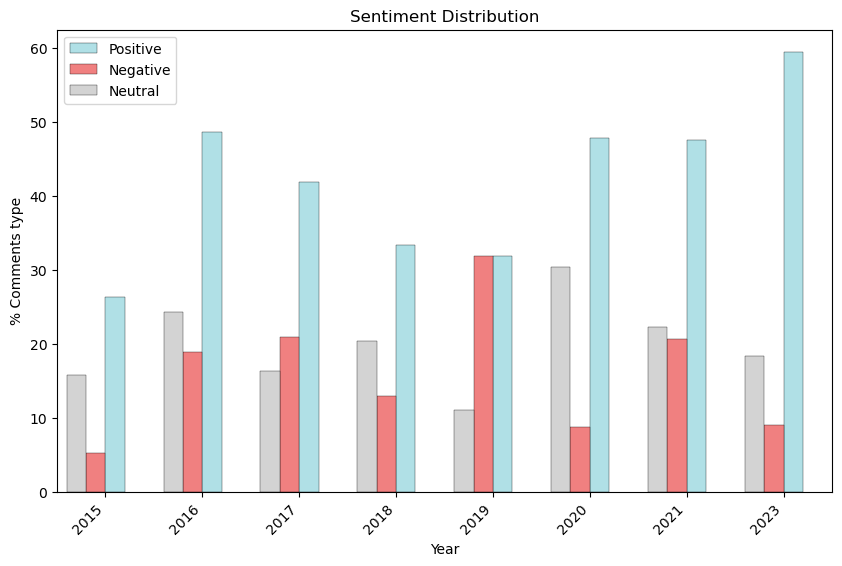

In [20]:
# positive comments
positive_data = positive_df.groupby('Year')['Sentiment'].count()
normalized_positive_data = positive_data.div(comment_data, fill_value=0)*100

# negative comments
negative_data = negative_df.groupby('Year')['Sentiment'].count()
normalized_negative_data = negative_data.div(comment_data, fill_value=0)*100

#neutral comments
neutral_data = neutral_df.groupby('Year')['Sentiment'].count()
normalized_neutral_data = neutral_data.div(comment_data, fill_value=0)*100

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each DataFrame on the same axes
normalized_positive_data.plot(kind='bar', color='powderblue', width=0.2, position=0, ax=ax, label='Positive', edgecolor='black', linewidth=0.25)
normalized_negative_data.plot(kind='bar', color='lightcoral', width=0.2, position=1, ax=ax, label='Negative', edgecolor='black', linewidth=0.25)
normalized_neutral_data.plot(kind='bar', color='lightgray', width=0.2, position=2, ax=ax, label='Neutral', edgecolor='black', linewidth=0.25)

# Set labels and title
ax.set_ylabel('% Comments type')
ax.set_title('Sentiment Distribution')
ax.set_xticklabels(normalized_positive_data.index, rotation=45, ha='right')
ax.set_xlim(-0.5, len(normalized_positive_data) - 0.5)
ax.legend()
plt.show()

In [21]:
# function to plot data points
def plot_functions(country_id):

    if country_id == '':
        positive_comments_country = positive_df
        negative_comments_country = negative_df
        neutral_comments_country = neutral_df
        Happy_df = sentiment_df2
    else:
            # Filter the DataFrame for the specific country
        positive_comments_country = positive_df[positive_df['Country'] == country_id]
        negative_comments_country = negative_df[negative_df['Country'] == country_id]
        neutral_comments_country = neutral_df[neutral_df['Country'] == country_id]
        Happy_df = sentiment_df2[sentiment_df2['Country'] == country_id]


    # Group by 'Year' and 'Platform' and count the sentiments
    grouped_data_pos = positive_comments_country.groupby(['Year', 'Platform'])['Sentiment'].count()
    grouped_data_neg = negative_comments_country.groupby(['Year', 'Platform'])['Sentiment'].count()
    grouped_data_neu = neutral_comments_country.groupby(['Year', 'Platform'])['Sentiment'].count()
    grouped_data = Happy_df.groupby(['Year'])['ladder_score'].mean()

    # Divide each 'Sentiment' value by the total sentiment for the corresponding year
    result_pos = grouped_data_pos.div(grouped_data_pos.groupby('Year').transform('sum'))*100
    result_neg = grouped_data_neg.div(grouped_data_neg.groupby('Year').transform('sum'))*100
    result_neu = grouped_data_neu.div(grouped_data_neu.groupby('Year').transform('sum'))*100

    result_pos_df = result_pos.to_frame().reset_index()
    result_neg_df = result_neg.to_frame().reset_index()
    result_neu_df = result_neu.to_frame().reset_index()


    # # Pivot the data for plotting
    pivot_data_pos = result_pos_df.pivot(index='Year', columns='Platform', values='Sentiment')
    pivot_data_neg = result_neg_df.pivot(index='Year', columns='Platform', values='Sentiment')
    pivot_data_neu = result_neu_df.pivot(index='Year', columns='Platform', values='Sentiment')

    # Plot the data
    colors = ['royalblue', 'deeppink', 'darkturquoise']
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    pivot_data_pos.plot(kind='bar', stacked=False, ylabel='% positive comments',ax=axs[0], title='Positive', legend=False, color=colors)
    pivot_data_neg.plot(kind='bar', stacked=False, ylabel='% negative comments',ax=axs[1], title='Negative', legend=False, color=colors)
    pivot_data_neu.plot(kind='bar', stacked=False, ylabel='% neutral comments',ax=axs[2], title='Neutral', legend=False, color=colors)
    # Get handles for legend items
    handles = [plt.Line2D([0], [0], color=color, linewidth=8, linestyle='-') for color in colors]

    # Plot the legend with specified handles and labels
    fig.legend(handles, ['Facebook', 'Instagram', 'Twitter'], title='Platform', loc='upper right')
    axs[0].set_ylim(0, 100)  # Adjust the limits
    axs[1].set_ylim(0, 100)
    axs[2].set_ylim(0, 100)
    plt.show()

    # Plot country's data 
    plt.figure(figsize=(8, 5))
    plt.plot(grouped_data)
    plt.xlabel('Year')
    plt.ylabel('happiness index')
    plt.title('happiness index by Year')
    plt.ylim(3,9)
    plt.show()

List of available country: ['Brazil' 'Canada' 'Greece' 'France' 'Japan' 'Germany' 'UK' 'Jordan' 'USA'
 'Australia' 'India' 'Cambodia' 'Sweden' 'Ireland' 'Portugal' 'Italy'
 'South Africa' 'Peru' 'Austria' 'Spain' 'China' 'Netherlands']


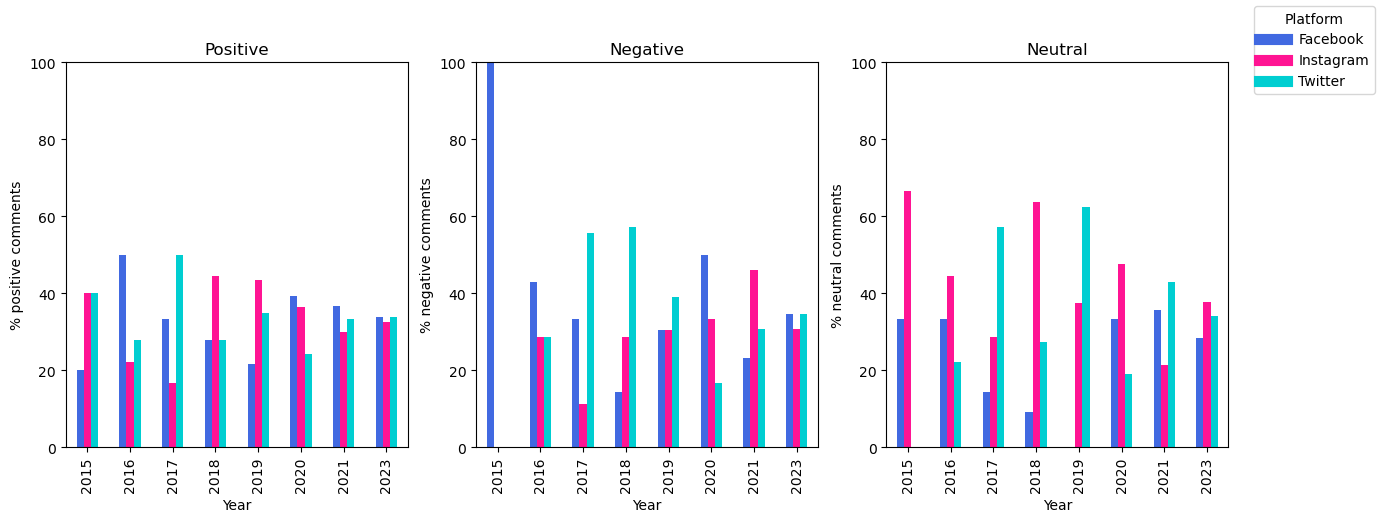

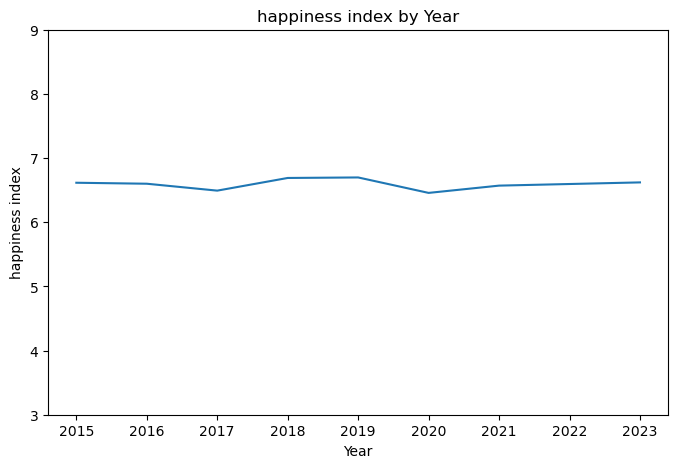

In [23]:
# enter a specific country or press enter to retrieve data for all countries in the list

print('List of available country: ' + str(positive_df['Country'].unique()))

country = input("Enter the country for filtering the data: ")
plot_functions(country)

In [24]:
# General Linear model
glm_matrix = happiness_df2.dropna(how='any')
happpyness_index = glm_matrix['ladder_score']
features_array = glm_matrix[['gdp_per_capita', 'generosity', 'social_support', 'corruption']]

# Pre-allocation
coefficients = []
r_squared_tot = []
mse_tot = []


for i in range(100):
    X_train, X_test, y_train, y_test = sms.train_test_split(features_array, happpyness_index, test_size=0.2, random_state=i)

    # Initialize and fit the linear regression model
    clf = LinearRegression()
    clf.fit(X_train, y_train)

    # Perform cross-validation
    cv_scores = sms.cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()

    y_pred = clf.predict(X_test)

    mse = skm.mean_squared_error(y_test, y_pred)
    r_squared = skm.r2_score(y_test, y_pred)

    coeff = clf.coef_

    coefficients.append(coeff)
    r_squared_tot.append(r_squared)
    mse_tot.append(mse)

print("Mean Squared Error:", sum(mse_tot)/len(mse_tot))
print("R-squared:", sum(r_squared_tot)/len(r_squared_tot))


Mean Squared Error: 0.6280821559364048
R-squared: 0.5011961114460614


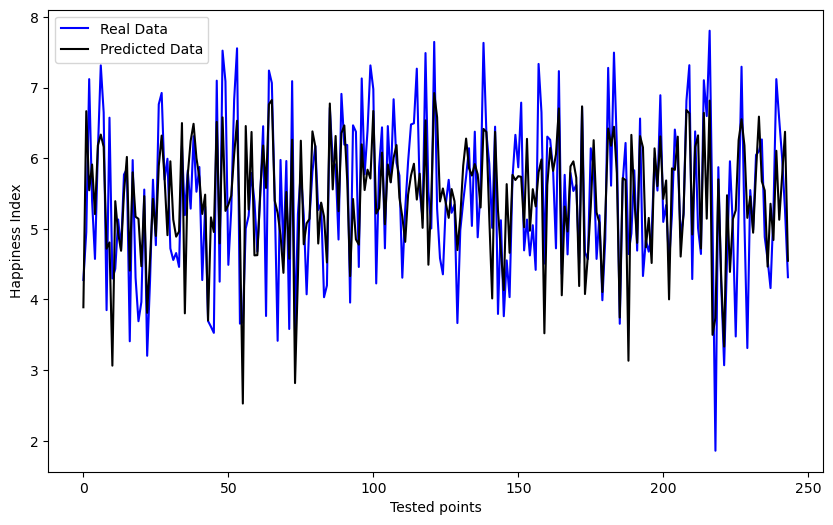

In [25]:
x_values = list(range(0,len(y_pred)))
fig, ax = plt.subplots(figsize=(10, 6))
line1, = ax.plot(x_values, y_test, color ='b', label ='Real Data')
line2, = ax.plot(x_values, y_pred, color ='k', label='Predicted Data')
plt.legend(handles = [line1,line2] )
plt.ylabel('Happiness Index')
plt.xlabel('Tested points')
plt.show()


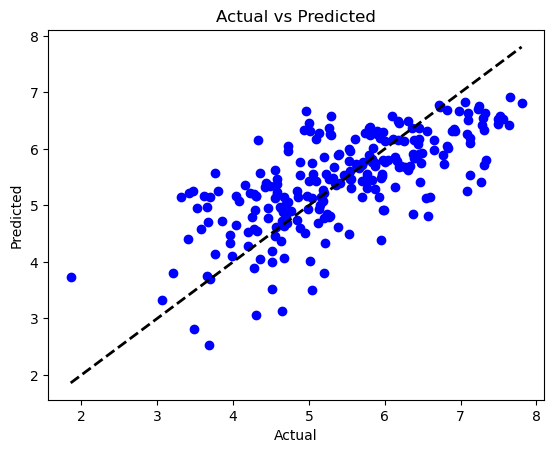

In [26]:
# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

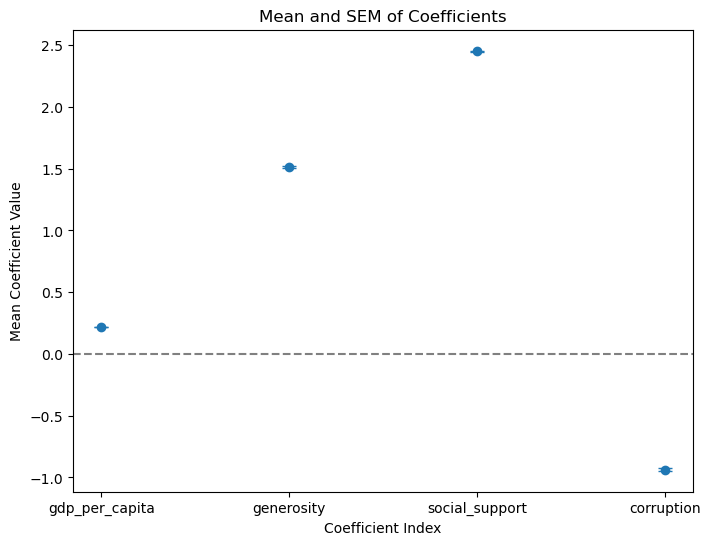

In [27]:

# Convert list of arrays to a 2D NumPy array
coefficients_array = np.array(coefficients)

# Compute mean and SEM for each column
mean_values = np.mean(coefficients_array, axis=0)
sem_values = np.std(coefficients_array, axis=0) / np.sqrt(coefficients_array.shape[0])
coefficient_labels = ['gdp_per_capita', 'generosity', 'social_support', 'corruption']

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(np.arange(len(mean_values)), mean_values, yerr=sem_values, fmt='o', capsize=5)
plt.xticks(np.arange(len(mean_values)), coefficient_labels)
plt.xlabel('Coefficient Index')
plt.ylabel('Mean Coefficient Value')
plt.title('Mean and SEM of Coefficients')
# plt.grid(True)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()




In [28]:
coeff_df = pd.DataFrame(coefficients_array)
data_columns = [0, 1, 2, 3]

for pair in itertools.combinations(data_columns, 2):
    col1 = pair[0]
    col2 = pair[1]
    data_col1 = coeff_df[col1].dropna()
    data_col2 = coeff_df[col2].dropna()
    
    f_statistic, p_value = st.f_oneway(data_col1, data_col2)
    
    print(f"ANOVA for columns '{col1}' and '{col2}': F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for columns '0' and '1': F-statistic = 22575.867718195164, p-value = 5.477060049167248e-206
ANOVA for columns '0' and '2': F-statistic = 320016.723243951, p-value = 1.21436e-319
ANOVA for columns '0' and '3': F-statistic = 17296.16810492467, p-value = 1.1992881693466647e-194
ANOVA for columns '1' and '2': F-statistic = 9844.138587135509, p-value = 8.838909465302931e-171
ANOVA for columns '1' and '3': F-statistic = 39869.72756150072, p-value = 2.8009244139072546e-230
ANOVA for columns '2' and '3': F-statistic = 125426.25389395804, p-value = 2.0652660264001877e-279


The correlation between happiness index and the positive comments is 0.41


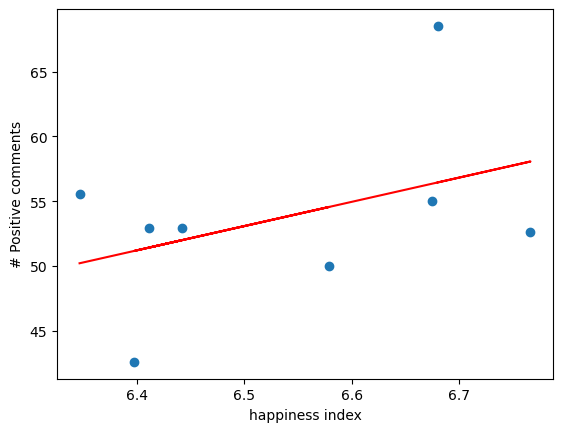

The correlation between happiness index and the negative comments is -0.37


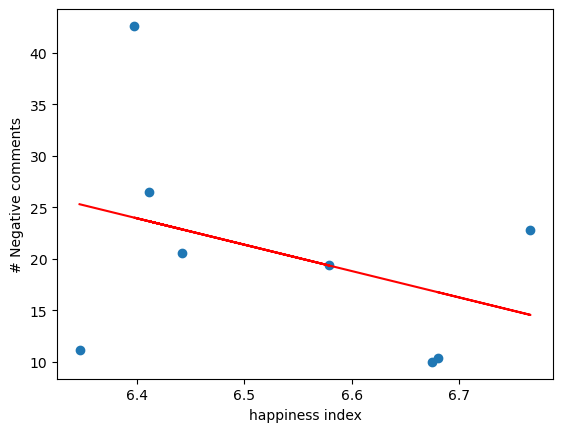

The correlation between happiness index and the neutral comments is 0.16


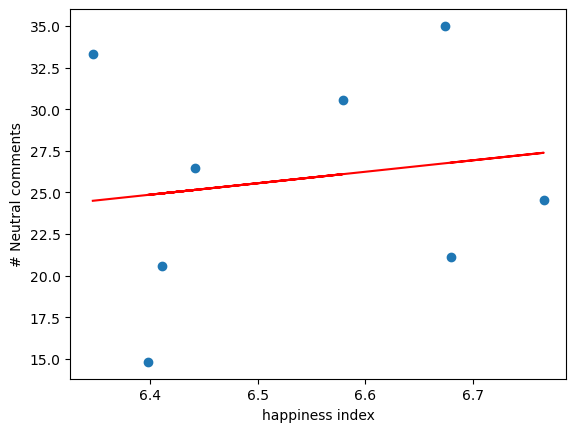

In [29]:
# Correlation analysis Social vs happiness index
grouped_data_pos = positive_df.groupby(['Year'])['Sentiment'].count()
grouped_data_neg = negative_df.groupby(['Year'])['Sentiment'].count()
grouped_data_neu = neutral_df.groupby(['Year'])['Sentiment'].count()
tot = grouped_data_pos+grouped_data_neg+grouped_data_neu

# Divide each 'Sentiment' value by the total sentiment for the corresponding year
result_pos = grouped_data_pos.div(tot)*100
result_neg = grouped_data_neg.div(tot)*100
result_neu = grouped_data_neu.div(tot)*100

happiness_index = positive_df.groupby(['Year'])['ladder_score'].mean()


#Positive correlations
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happiness_index, result_pos)
pe_fit = pe_slope * np.array(happiness_index) + pe_int
print(f'The correlation between happiness index and the positive comments is {round(pe_r,2)}')
plt.scatter(happiness_index,result_pos)
plt.plot(happiness_index,pe_fit,'-',color='red')
plt.xlabel('happiness index')
plt.ylabel('# Positive comments')
plt.show()

# negative correlation
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happiness_index, result_neg)
pe_fit = pe_slope * np.array(happiness_index) + pe_int
print(f'The correlation between happiness index and the negative comments is {round(pe_r,2)}')
plt.scatter(happiness_index,result_neg)
plt.plot(happiness_index,pe_fit,'-',color='red')
plt.xlabel('happiness index')
plt.ylabel('# Negative comments')
plt.show()

#neutral correlation
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happiness_index, result_neu)
pe_fit = pe_slope * np.array(happiness_index) + pe_int
print(f'The correlation between happiness index and the neutral comments is {round(pe_r,2)}')
plt.scatter(happiness_index,result_neu)
plt.plot(happiness_index,pe_fit,'-',color='red')
plt.xlabel('happiness index')
plt.ylabel('# Neutral comments')
plt.show()

In [30]:
# country_id = 'USA'

# positive_comments_country = positive_df[positive_df['Country'] == country_id]
# negative_comments_country = negative_df[negative_df['Country'] == country_id]
# neutral_comments_country = neutral_df[neutral_df['Country'] == country_id]

# # Correlation analysis Social vs Happyness index
# grouped_data_pos = positive_comments_country.groupby(['Year'])['Sentiment'].count()
# grouped_data_neg = negative_comments_country.groupby(['Year'])['Sentiment'].count()
# grouped_data_neu = neutral_comments_country.groupby(['Year'])['Sentiment'].count()
# tot = grouped_data_pos+grouped_data_neg+grouped_data_neu

# # Divide each 'Sentiment' value by the total sentiment for the corresponding year
# result_pos = grouped_data_pos.div(tot)*100
# result_neg = grouped_data_neg.div(tot)*100
# result_neu = grouped_data_neu.div(tot)*100

# happyness_index = positive_df.groupby(['Year'])['ladder_score'].mean()


# #Positive correlations
# pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happyness_index, result_pos)
# pe_fit = pe_slope * np.array(happyness_index) + pe_int
# print(f'The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}')
# plt.scatter(happyness_index,result_pos)
# plt.plot(happyness_index,pe_fit,'-',color='red')
# plt.xlabel('Happyness index')
# plt.ylabel('# Positive comments')
# plt.show()

# # negative correlation
# pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happyness_index, result_neg)
# pe_fit = pe_slope * np.array(happyness_index) + pe_int
# print(f'The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}')
# plt.scatter(happyness_index,result_neg)
# plt.plot(happyness_index,pe_fit,'-',color='red')
# plt.xlabel('Happyness index')
# plt.ylabel('# Negative comments')
# plt.show()

# #neutral correlation
# pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(happyness_index, result_neu)
# pe_fit = pe_slope * np.array(happyness_index) + pe_int
# print(f'The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}')
# plt.scatter(happyness_index,result_neu)
# plt.plot(happyness_index,pe_fit,'-',color='red')
# plt.xlabel('Happyness index')
# plt.ylabel('# Neutral comments')
# plt.show()